<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PABLOALFONSO117/blob/main/TAREA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea: En un nuevo notebook realiza algunos ejemplos, de funciones o aplicaciones que no conocias, de los capitulos 2, 3 y 4 del LIBRO

Rangos de una lista

In [7]:
Lista0 = list(range(10))
Lista0

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

vemos que efectivamente el rango de la lista empieza en cero


In [8]:
Lista1 = [str(c) for c in Lista0]
Lista1


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
type(Lista1[0])

str

Vemos tambien que se puede crear una lista de strings

In [12]:
Lista3 = [True, "3", 4.1, 6]
[type(item) for item in Lista3]

[bool, str, float, int]

Se pueden crear listas heterogeneas tambien

In [13]:
import numpy as np

In [15]:
np.array([range(i, i + 3) for i in [1, 2, 3]])

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

Vemos que podemos crear los arrays multidimensionales, hacer un vector de vectores lo cual es una matriz

In [17]:
np.full((3, 3), 3.14)

array([[3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14]])

Podemos crear una matriz de la dimensión que se requiera  y tambien con el mismo valor

GRAFICA DE FUNCIONES EN 2D

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
#AQUI XY TIENEN SALTOS DE 3 EN 3 A 9
x = np.linspace(0, 3, 9)
y = np.linspace(0, 3, 9)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

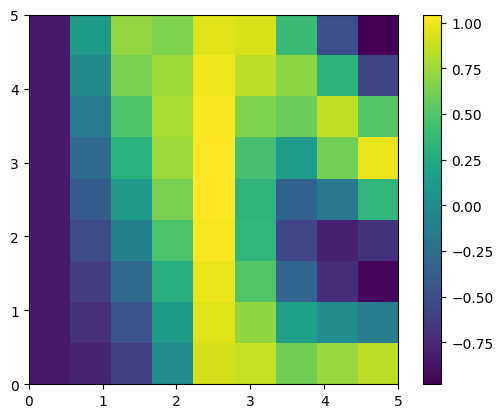

In [23]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

Indexar un Array (o vector)

In [2]:
import numpy as np
#importante hace uso de la librería

In [4]:
rand = np.random.RandomState(10)

a = rand.randint(100, size=10)
print(a)

[ 9 15 64 28 89 93 29  8 73  0]


se genera un vector de 10 numeros aleatorios del 0 al 100 y se indexan las posiciones en el vector aleatorio en forma de matriz 2x2

In [8]:
ind = np.array([[3, 7],
                [4, 5]])
a[ind]

array([[28,  8],
       [89, 93]])

**SELECCION DE PUNTOS ALEATORIOS **

In [5]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

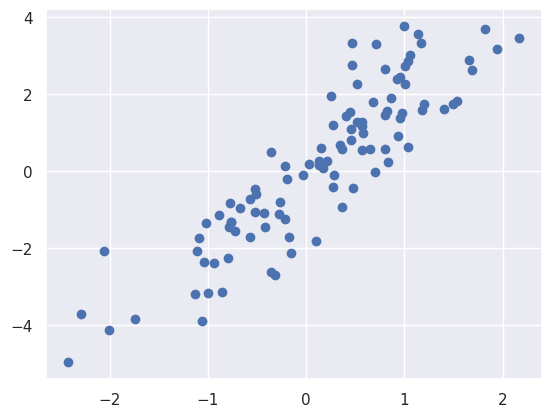

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Se seleccionan los puntos aleatorios del subset

In [10]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([81, 92, 75, 93, 96, 48, 36, 79, 45, 74, 64, 39, 40, 41, 76, 19, 95,
       38, 94,  0])

In [11]:
selection = X[indices]  # aqui se indexa
selection.shape

(20, 2)

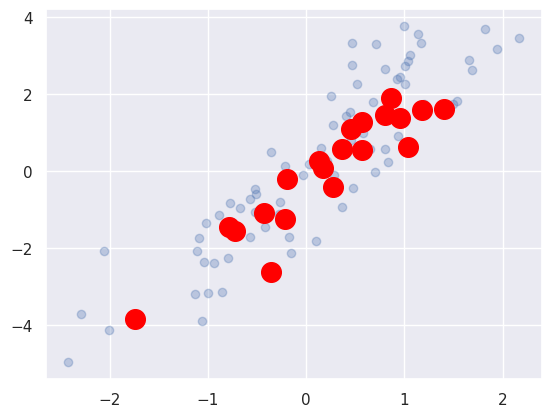

In [14]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red', s=200);

Se seleccionan los puntos del subset aleatorios como podemos ver en un grafico dos dimensional lo cual es muhy importante para aplicaciones futuras



INTRODUCCION DE OBJETOS PANDA (SON UNA VERSION MAS COMPLETA DE LOS ARRAYS ESTRUCTURADOS DE NUMPY)

In [16]:
import numpy as np
import pandas as pd

In [18]:
data = pd.Series([7, 8, 9, 10])
data

0     7
1     8
2     9
3    10
dtype: int64

Las series pandas se pueden entender como un diccionario especializado de python, un diccionario es una estrucutura que mapea llaves arbitrarias a un set de valores que se predefinieron.

In [20]:
population_dict = {'Mexico': 38332521,
                   'Belgium': 26448193,
                   'Brussels': 19651127,
                   'Antwerpen': 19552860,
                   'Istanbul': 12882135}
population = pd.Series(population_dict)
population

Mexico       38332521
Belgium      26448193
Brussels     19651127
Antwerpen    19552860
Istanbul     12882135
dtype: int64

Ahora podemos indexar por nombre y nos devuelve el valor numerico

In [21]:
population['Belgium']

26448193

In [23]:
area_dict = {'Mexico': 423967, 'Belgium': 695662, 'Brussels': 141297,
             'Antwerpen': 170312, 'Istanbul': 149995}
area = pd.Series(area_dict)
area

Mexico       423967
Belgium      695662
Brussels     141297
Antwerpen    170312
Istanbul     149995
dtype: int64

Podemos construir un objeto 2d que contega los datos de la serie panda en una tabla

In [24]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
Mexico,38332521,423967
Belgium,26448193,695662
Brussels,19651127,141297
Antwerpen,19552860,170312
Istanbul,12882135,149995


TABLAS DE PIVOTE
Una tabla de pivote es una operacion similar a las que se hacen en las hojas de calculo en datos tabulares, la tabla de pivote toma una simple columna de datos como entrada y agrupa las entradas en una tabla 2d

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


La tabla contiene los datos de los pasajeros del titanic haciendo una clasificacion por columna

# ***SERIES EN EL TIEMPO***

Python tiene un numero de representaciones disponibles para fechas, tiempos, deltas y lapsos de tiempo, mientras que las series de tiempo en pandas tienden a ser mas utiles en el manejo de datos

In [34]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Vemos que podemos manualmente construir una fecha y hallar tambien el día de la semana que concuerda con esa fecha

In [36]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [37]:
date.strftime('%A')

'Saturday'

In [1]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [2]:
date.strftime('%A')

'Saturday'

indexando series panda en tiempo, podemos construir una serie objeto que tenga datos de tiempo indexados

In [4]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Ya que tenemos esta serie de datos, podemos usar cualquier patron de indexamiento de las series panda

In [5]:
data['2014-07-04':'2015-07-04']


2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

# ***GRAFICOS EN PYTHON***

ES importante emplear las librerias descritas en el siguiente fragmento para poder graficar

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-6-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


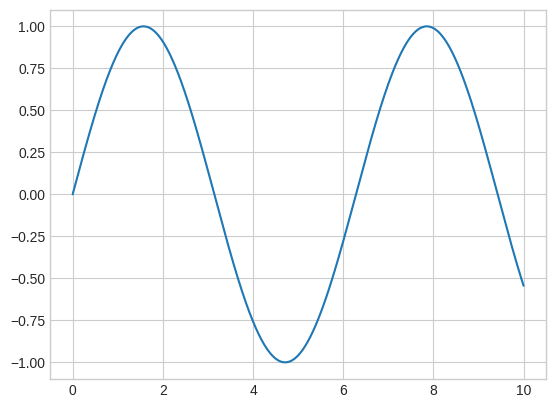

In [7]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

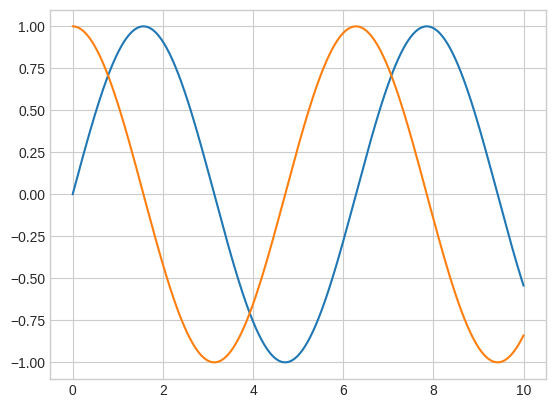

In [8]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Grafica del seno y coseno en un mismo plano

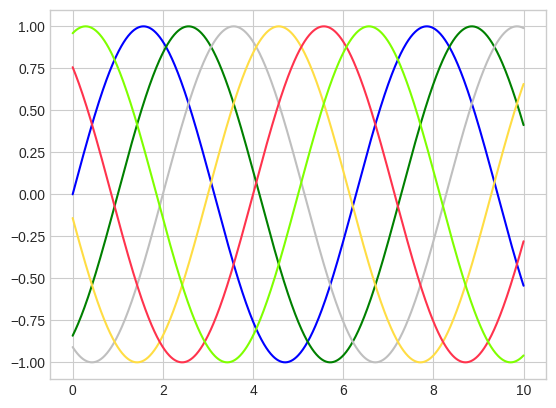

In [9]:
plt.plot(x, np.sin(x - 0), color='blue')        # se especifica el color por nombre
plt.plot(x, np.sin(x - 1), color='g')           # codigo corto de color
plt.plot(x, np.sin(x - 2), color='0.75')        # escala de grises entre 0 y 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # codigo Hex entre 000 y FFF
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # Tuple Rgb
plt.plot(x, np.sin(x - 5), color='chartreuse'); # todos los colores html

Ajustando el grafico, limites de los ejes
Se pueden ajustar los limites de los ejes con plt. eje lim

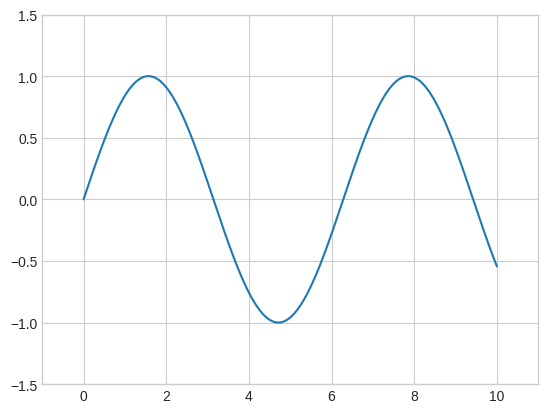

In [10]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);


# ***GRAFICOS CON DISPERSIÓN (SCATERRING)***

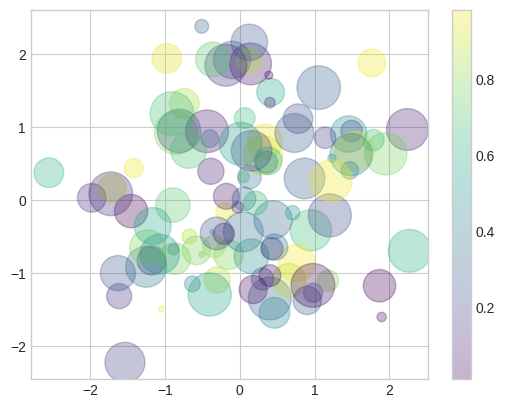

In [11]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Con la funcion de scattering se pueden crear graficos en los que las propiedades de los puntos individuales, tamaño, color, colores de los ejes, se pueden controlar individualmente o mappeados a los datos

# ***SUB GRAFICOS MULTIPLES***

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

<ipython-input-12-9721c6b74aa7>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


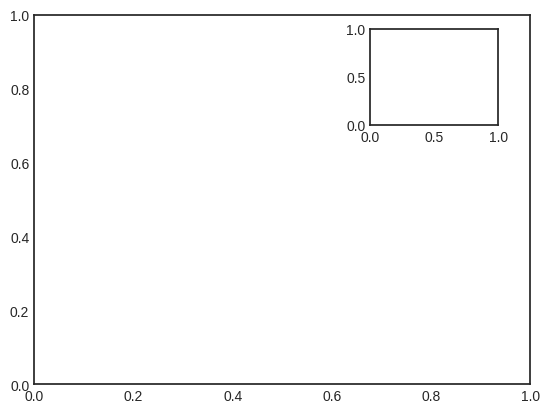

In [13]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

El dual de sinusoides en un grafico multiple

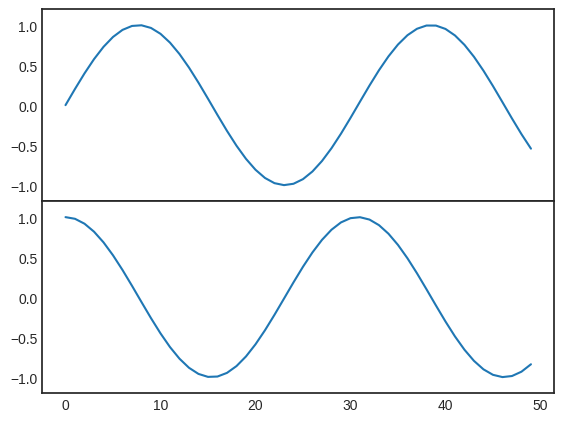

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));


# ***GRAFICOS EN 3D***

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

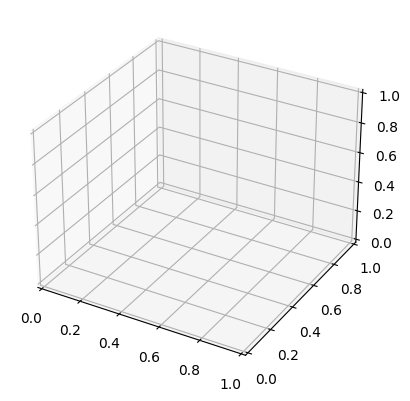

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Matplotlib puede crear graficos en 3d, se pueden crear con matplot3d, una vez que el modulo se importa se pueden crear ejes tridimensionalescon la proyeccion 3 dimensional

In [2]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Obtenemos un grafico de una funcion de 3 variables en blanco y negro con ejes predefinidos

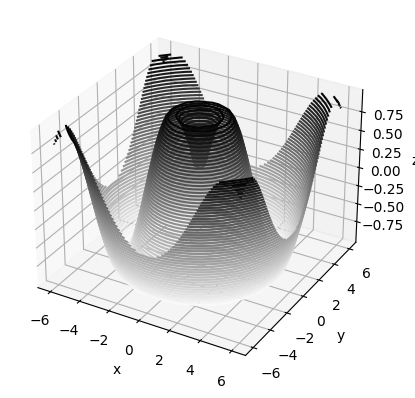

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

El mismo grafico, ahora añadiendo colores a la funcion 3d

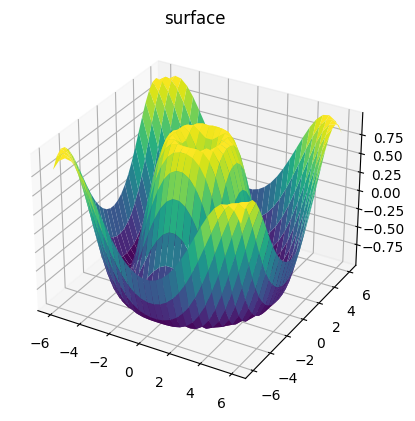

In [5]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');